In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.7. Cluster Variable Averages')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1009. NC ENVRIOSCAN/P1009.3. Analyses/P1009.3.7. Cluster Variable Averages/Output')
cur_date = "031123"

library(readxl)
library(tidyverse)
library(reshape2)
library(tidytext)
library(rcartocolor)
library(MetBrewer)
library(cowplot)
library(scales)

# reading in files
ejscreen_cluster_df = data.frame(read_excel("Input/GEO_ID_Sociodemographic_WHP_Clusters_030923.xlsx"))
housing_cluster_df = data.frame(read_excel("Input/GEO_ID_Housing_WHP_Clusters_030923.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
head(ejscreen_cluster_df)
head(housing_cluster_df)

,GEO_ID,Census_Tract,County,Variables,Value,Scaled_Value,Cluster
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201,Alamance,Population_Under_5,9.5,1.45505705,2
2,14000US37001020100,201,Alamance,Population_Over_65,15.1,-0.20830239,2
3,14000US37001020100,201,Alamance,Race_Non_White,39.0,0.33152444,2
4,14000US37001020100,201,Alamance,Hispanic_Latino,9.5,0.04751546,2
5,14000US37001020100,201,Alamance,Non_Proficient_English_Speakers,3.9,-0.09987681,2
6,14000US37001020100,201,Alamance,Poverty_Overall,27.2,1.07413661,2


,GEO_ID,Census_Tract,County,Variables,Value,Scaled_Value,Cluster
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,14000US37001020100,201,Alamance,Housing_Density,31.54848,-0.5811327,2
2,14000US37001020100,201,Alamance,Median_House_Value,149600.00000,-0.1953423,2
3,14000US37001020100,201,Alamance,Wildfire_Hazard_Potential_Mean,92.23704,-0.6525540,2
4,14000US37001020200,202,Alamance,Housing_Density,26.03618,-0.5863730,2
5,14000US37001020200,202,Alamance,Median_House_Value,83400.00000,-0.8163955,2
6,14000US37001020200,202,Alamance,Wildfire_Hazard_Potential_Mean,92.23704,-0.6525540,2


Plotting the average scaled value for each variable within each cluster to visualize the magnitude and directionality of each variable.

In [3]:
# combining each into 1 df
# ejscreen
averaged_ejscreen_df = ejscreen_cluster_df %>%
    # averaging values for each variable within each cluster
    group_by(Cluster, Variables) %>%
    summarize(Avg_Scaled_Value = mean(Scaled_Value), Avg_Value = mean(Value)) %>%
    # lastly arranging variables from highest to lowest within each cluster
    arrange(-Avg_Scaled_Value, .by_group = TRUE) %>%
    ungroup()

# ejscreen_df$Variable = as.character(ejscreen_df$Variable)
averaged_ejscreen_df$Cluster = as.character(averaged_ejscreen_df$Cluster)

# housing
averaged_housing_df = housing_cluster_df %>%
    # averaging values for each variable within each cluster
    group_by(Cluster, Variables) %>%
    summarize(Avg_Scaled_Value = mean(Scaled_Value), Avg_Value = mean(Value)) %>%
    # lastly arranging variables from highest to lowest within each cluster
    arrange(-Avg_Scaled_Value, .by_group = TRUE) %>%
    ungroup()

# housing_df$Variable = as.character(housing_df$Variable)
averaged_housing_df$Cluster = as.character(averaged_housing_df$Cluster)

head(averaged_ejscreen_df)

`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.


Cluster,Variables,Avg_Scaled_Value,Avg_Value
<chr>,<chr>,<dbl>,<dbl>
1,Hispanic_Latino,1.7256152,23.750459
1,Non_Proficient_English_Speakers,1.6850125,13.098165
1,Population_Under_5,0.9079251,8.088379
1,Race_Non_White,0.7764788,49.485627
1,Poverty_Overall,0.4507231,20.589908
1,Unemployed,0.1399474,6.612876


In [4]:
# exporting data
# write.csv(averaged_ejscreen_df, paste0(Output,"/", cur_date, "_EJScreen_Cluster_Averages.csv"), row.names = FALSE)
# write.csv(averaged_housing_df, paste0(Output,"/", cur_date, "_Housing_Cluster_Average.csv"), row.names = FALSE)

# EJ Screen Cluster Variables

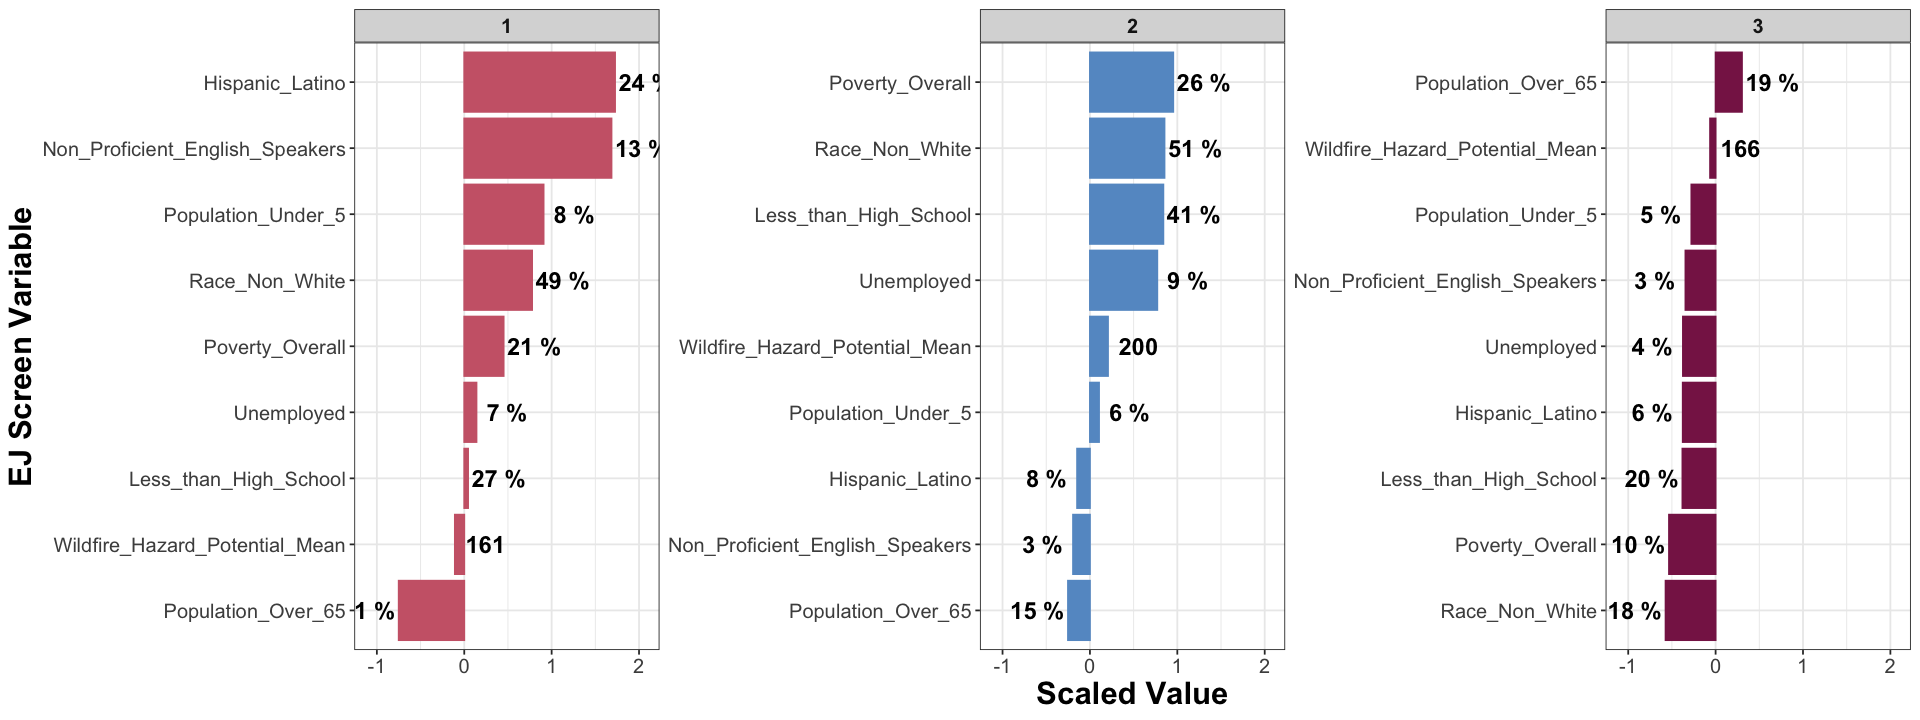

In [5]:
options(repr.plot.width = 16, repr.plot.height = 6) #changing size

# getting color palette
prism_colors = carto_pal(12, "Safe")

avg_ejscreen_figure_version1 = ggplot() + 
  geom_col(data = averaged_ejscreen_df, aes(x = Avg_Scaled_Value, 
                                            y = reorder_within(Variables, Avg_Scaled_Value, Cluster), 
                                            color = Cluster, fill = Cluster)) + 
  # adding in original values for clarity
  geom_text(data = averaged_ejscreen_df %>%
                filter(Avg_Scaled_Value > 0 & Avg_Value < 100), aes(x = Avg_Scaled_Value + 0.35, label = paste(round(Avg_Value),"%"), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = averaged_ejscreen_df %>%
                filter(Avg_Scaled_Value < 0 & Avg_Value < 100), aes(x = Avg_Scaled_Value - 0.35, label = paste(round(Avg_Value),"%"), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = averaged_ejscreen_df %>%
                filter(Avg_Value > 100), aes(x = Avg_Scaled_Value + 0.35, label = round(Avg_Value), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +

  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Cluster, scales = 'free_y') + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = prism_colors[c(2,11,9)]) +
  scale_fill_manual(values = prism_colors[c(2,11,9)]) +

  labs(y = 'EJ Screen Variable', x = "Scaled Value")

avg_ejscreen_figure_version1

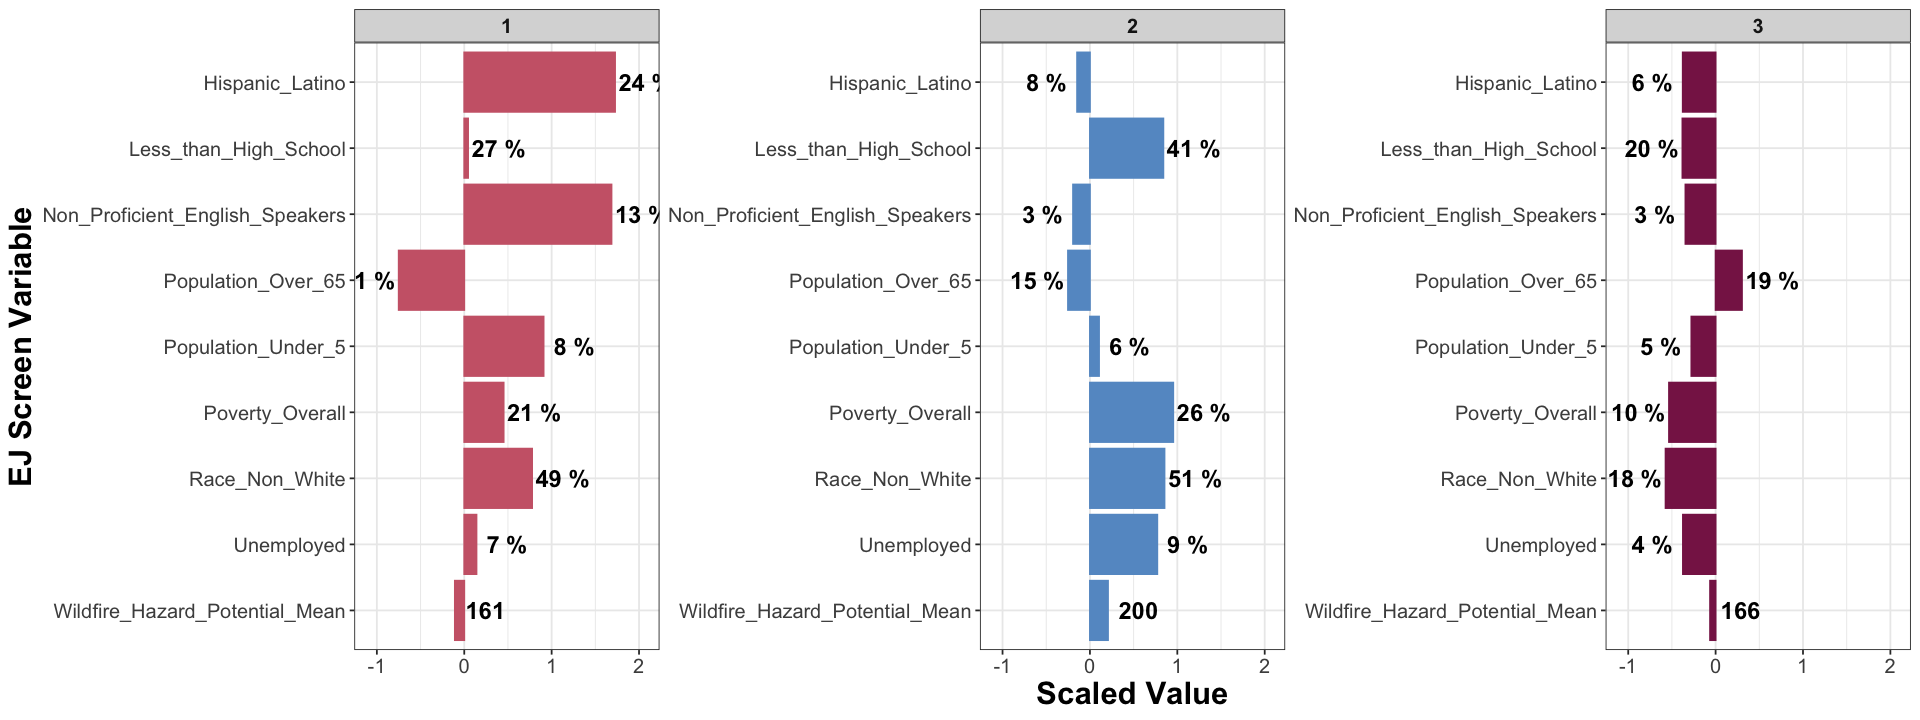

In [6]:
# alphabetizing these variables in this version
averaged_ejscreen_df$Variables = factor(averaged_ejscreen_df$Variables, 
                                        levels = rev(sort(unique(averaged_ejscreen_df$Variables))))
                                       
avg_ejscreen_figure_version3 = ggplot() + 
  geom_col(data = averaged_ejscreen_df, aes(x = Avg_Scaled_Value, y = Variables, 
                                            color = Cluster, fill = Cluster)) + 
  # adding in original values for clarity
  geom_text(data = averaged_ejscreen_df %>%
                filter(Avg_Scaled_Value > 0 & Avg_Value < 100), aes(x = Avg_Scaled_Value + 0.35, label = paste(round(Avg_Value),"%"), 
                y = Variables), fontface = "bold", size = 5) +
  geom_text(data = averaged_ejscreen_df %>%
                filter(Avg_Scaled_Value < 0 & Avg_Value < 100), aes(x = Avg_Scaled_Value - 0.35, label = paste(round(Avg_Value),"%"), 
                y = Variables), fontface = "bold", size = 5) +
  geom_text(data = averaged_ejscreen_df %>%
                filter(Avg_Value > 100), aes(x = Avg_Scaled_Value + 0.35, label = round(Avg_Value), 
                y = Variables), fontface = "bold", size = 5) +

  facet_wrap(~Cluster, scales = 'free_y') + 
  theme_bw() + #changing theme
  theme(axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        strip.text = element_text(size = 12, face = "bold"), #changing facet wrap text
        legend.position = "none") + #removing legend

  scale_color_manual(values = prism_colors[c(2,11,9)]) +
  scale_fill_manual(values = prism_colors[c(2,11,9)]) +

  labs(y = 'EJ Screen Variable', x = "Scaled Value")

avg_ejscreen_figure_version3

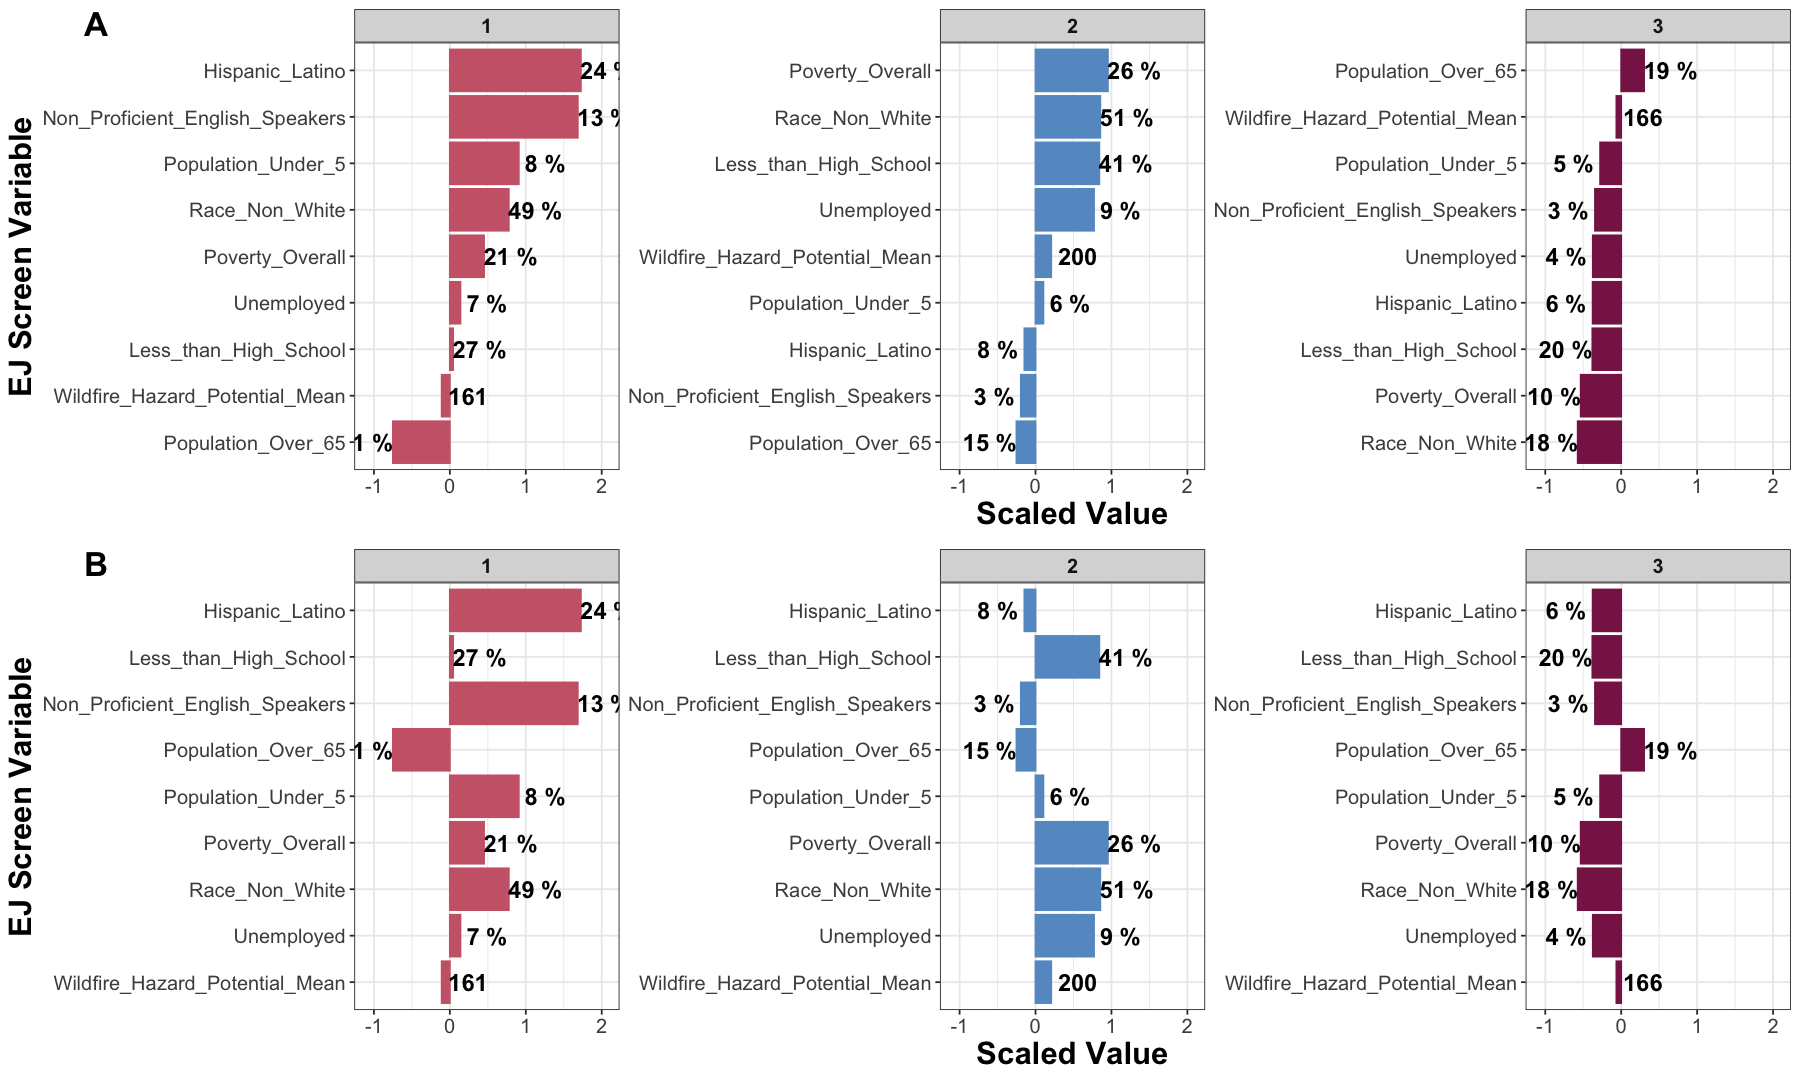

In [7]:
options(repr.plot.width = 15, repr.plot.height = 9) #changing size
plot_grid(avg_ejscreen_figure_version1, avg_ejscreen_figure_version3, ncol = 1,
                            # adding labels, changing size their size and position
                            labels = "AUTO", label_size = 20, label_x = 0.04)

# Housing Cluster Variables

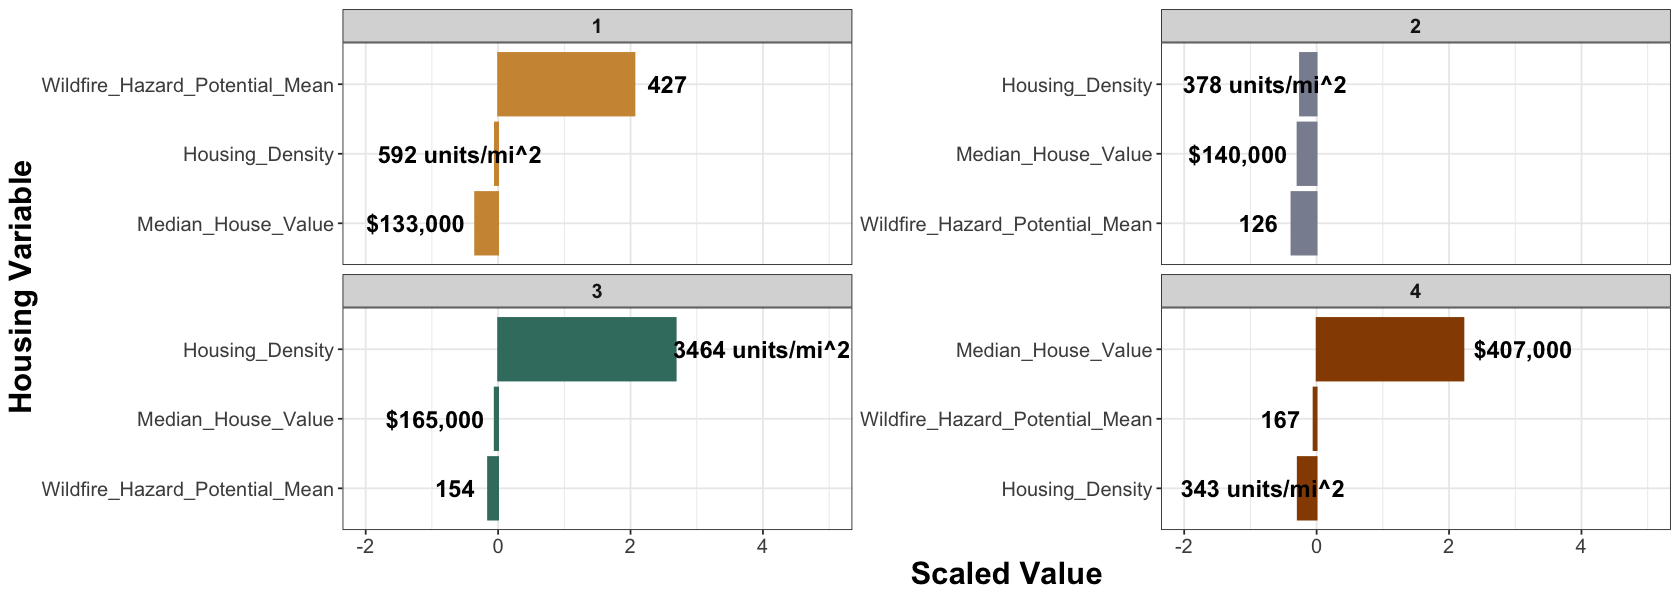

In [8]:
options(repr.plot.width = 14, repr.plot.height = 5) #changing size

# getting color palette
peru_palette = MetPalettes$Kandinsky[[1]]

ggplot(data = averaged_housing_df) + 
  geom_col(aes(x = Avg_Scaled_Value, y = reorder_within(Variables, Avg_Scaled_Value, Cluster), color = Cluster, 
               fill = Cluster)) + 
  # adding in original values for clarity
  geom_text(data = averaged_housing_df %>%
                filter(Variables == "Median_House_Value", Avg_Scaled_Value > 0), 
            aes(x = Avg_Scaled_Value + 0.9, label = dollar(round(Avg_Value, digits = -3)), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = averaged_housing_df %>%
                filter(Variables == "Median_House_Value", Avg_Scaled_Value < 0), 
            aes(x = Avg_Scaled_Value - 0.9, label = dollar(round(Avg_Value, digits = -3)), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = averaged_housing_df %>%
                filter(Variables == "Housing_Density", Avg_Scaled_Value > 0), 
            aes(x = Avg_Scaled_Value + 1.3, label = paste(round(Avg_Value),"units/mi^2"), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = averaged_housing_df %>%
                filter(Variables == "Housing_Density", Avg_Scaled_Value < 0), 
            aes(x = Avg_Scaled_Value - 0.53, label = paste(round(Avg_Value),"units/mi^2"), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = averaged_housing_df %>%
                filter(Variables == "Wildfire_Hazard_Potential_Mean", Avg_Scaled_Value < 0), 
            aes(x = Avg_Scaled_Value - 0.5, label = round(Avg_Value), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  geom_text(data = averaged_housing_df %>%
                filter(Variables == "Wildfire_Hazard_Potential_Mean", Avg_Scaled_Value > 0), 
            aes(x = Avg_Scaled_Value + 0.5, label = round(Avg_Value), 
                y = reorder_within(Variables, Avg_Scaled_Value, Cluster)), fontface = "bold", size = 5) +
  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(~Cluster, scales = 'free_y') + 
  theme_bw() + # changing theme
  theme(axis.text = element_text(size = 12), # changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), # changes axis titles
        strip.text = element_text(size = 12, face = "bold"), # changing facet wrap text
        legend.position = "none") + #removing legend
  xlim(-2,5) + # ADD WORDS

  scale_color_manual(values = c(peru_palette[2], peru_palette[c(3,1)], "#964B00")) +
  scale_fill_manual(values = c(peru_palette[2], peru_palette[c(3,1)], "#964B00")) +

  labs(y = 'Housing Variable', x = "Scaled Value")